In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

In [6]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
# print(np.sin(x))
# print(np.cos(x[:, np.newaxis]))

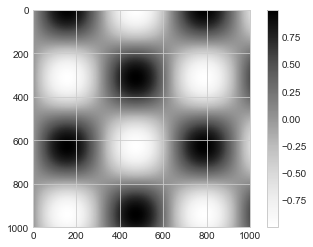

In [7]:
plt.imshow(I)
plt.colorbar()

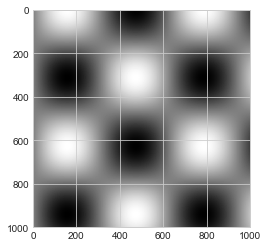

In [10]:
plt.imshow(I, cmap='gray')

In [11]:
view_colormap('viridis')

NameError: name 'view_colormap' is not defined

## 察看配色方案的函数

In [13]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """为配色方案显示灰度图"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # 将RGBA色转换成不同亮度的灰度值
    # 参考链接：http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))    
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):
    """用等价的灰度图表示配色方案"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2), subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

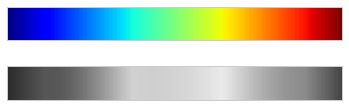

In [15]:
# 调用函数显示
view_colormap('jet')

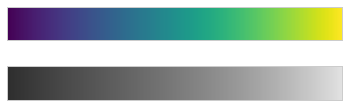

In [16]:
view_colormap('viridis')     # Matplotlib 2.0 的默认配色方案

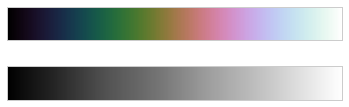

In [17]:
view_colormap('cubehelix')    # 彩虹色方案

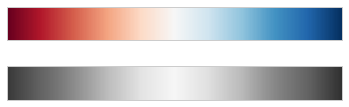

In [18]:
view_colormap('RdBu')   # 双色配色方案（红色 - 蓝色， Red-Blue 简称）

# 颜色条的设置

[[ True False False ... False False False]
 [False False False ... False False False]
 [False False False ...  True False False]
 ...
 [ True False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


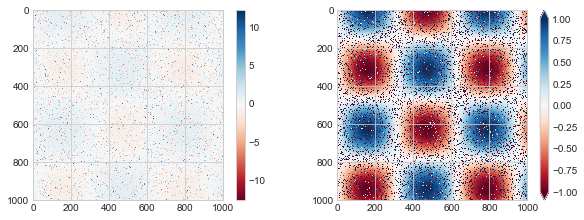

In [20]:
# 为图形像素设置1%的噪点
speckles = (np.random.random(I.shape) < 0.1)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')

plt.clim(-1, 1)

# 离散型颜色条

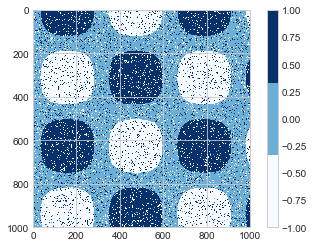

In [32]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 3))
plt.colorbar()
plt.clim(-1, 1)